In [65]:
%cd /Users/danielkim/Documents/Workspace/Vision/practice_code/VISION/Face/

/Users/danielkim/Documents/Workspace/Vision/practice_code/VISION/Face


In [66]:
# module import
import matplotlib.pyplot as plt
import pandas as pd
from imutils import paths
import numpy as np
import argparse
import cv2
import os
import random
from tqdm import tqdm
from glob import glob
from PIL import Image
import shutil

In [59]:
# %rm -r '/Users/danielkim/Documents/Workspace/Vision/practice_code/VISION/Face/code_out'
# %rm -r '/Users/danielkim/Documents/Workspace/Vision/practice_code/VISION/Face/headsegmentation_dataset_ccncsa'

# Data Preprocessing

In [67]:
shutil.unpack_archive('headsegmentation_dataset_ccncsa.zip','headsegmentation_dataset_ccncsa/samples')

In [68]:
os.makedirs('code_out')
os.makedirs('code_out/code_1')
os.makedirs('code_out/code_1/code_1_1')

In [69]:
%cd 'code_out/code_1/code_1_1'

/Users/danielkim/Documents/Workspace/Vision/practice_code/VISION/Face/code_out/code_1/code_1_1


In [70]:
inputPath = r"../../../headsegmentation_dataset_ccncsa/samples/"
labelsPath = r"../../../headsegmentation_dataset_ccncsa/labels"
outputPath = r"../../../headsegmentation_dataset_ccncsa/samplesArranged"

In [71]:
# %mkdir '../../../headsegmentation_dataset_ccncsa/labels'
%mkdir '../../../headsegmentation_dataset_ccncsa/samplesArrange'

In [72]:
os.rename('../../../headsegmentation_dataset_ccncsa/samples/labels','../../../headsegmentation_dataset_ccncsa/labels')

In [73]:
labelsDist = sorted(os.listdir(labelsPath))

In [74]:
print(labelsDist)

['female03', 'female10', 'female23', 'femalealison1', 'femalealison2', 'femalebarbera', 'femalebarbera2', 'femalecarla', 'femalecarla2', 'femalefelice', 'femalejoyce', 'femalejoyce2', 'femalelaura', 'femalelaura2', 'femaleroberta', 'male01', 'male06_1', 'male06_2', 'male09', 'male23', 'maleandrew', 'maleandrew2', 'malebruce', 'malebruce2', 'malecarlos', 'malecarlos2', 'malecorry', 'malecorry2', 'maleelias', 'maleelias2', 'malegaberial', 'malegaberial2', 'malekumar', 'maleshawn', 'multiperson', 'real']


In [75]:
for folder in labelsDist:
    os.makedirs(os.path.join(outputPath, folder))

In [76]:
folderTypes = {"female": [], "male": [], "multiperson": [], "real": []}

for folder in os.listdir(inputPath):
    if folder.startswith("female"):
        folderTypes["female"].append(folder.split("_")[0])
        if os.path.isdir(os.path.join(outputPath, folderTypes["female"][-1])):
            for file in os.listdir(os.path.join(inputPath, folder)):
                shutil.copy(os.path.join(inputPath, folder, file), os.path.join(outputPath, folderTypes["female"][-1], file))
    
    elif folder.startswith("multiperson"):
        folderTypes["multiperson"].append(folder.split("_")[0])
        if os.path.isdir(os.path.join(outputPath, folderTypes["multiperson"][-1])):
            for file in os.listdir(os.path.join(inputPath, folder)):
                shutil.copy(os.path.join(inputPath, folder, file), os.path.join(outputPath, folderTypes["multiperson"][-1], file))
    
    elif folder.startswith("male"):
        
        folderTypes["male"].append(folder.split("_")[0])
        if folder.startswith("male06") and "nolight" in folder:
            outFolder = "male06_2"
        
        elif folder.startswith("male06"):
            outFolder = "male06_1"
        
        else:
            outFolder = folderTypes["male"][-1]
        if os.path.isdir(os.path.join(outputPath, outFolder)):
            for file in os.listdir(os.path.join(inputPath, folder)):
                shutil.copy(os.path.join(inputPath, folder, file), os.path.join(outputPath, outFolder, file))

    else:
        if folder.startswith("real") and os.path.isdir(os.path.join(outputPath, "real")):
            for file in os.listdir(os.path.join(inputPath, folder)):
                shutil.copy(os.path.join(inputPath, folder, file), os.path.join(outputPath, "real", file))

In [77]:
for folder in labelsDist:
    if len(os.listdir(os.path.join(labelsPath, folder))) != len(os.listdir(os.path.join(outputPath, folder))):
        print(folder, len(os.listdir(os.path.join(labelsPath, folder))), len(os.listdir(os.path.join(outputPath, folder))))

female23 501 334
femalealison1 501 167
femalealison2 501 167
femalebarbera 501 334
femalecarla 501 334
femalefelice 501 251
femalejoyce 501 334
femalelaura 501 334
male06_1 351 284
male06_2 501 393
male09 351 117
male23 501 167
maleandrew 501 334
malebruce 501 334
malecarlos 501 334
malecarlos2 501 251
malecorry 501 334
maleelias 501 333
malegaberial 501 334
maleshawn 501 334
real 2505 2500


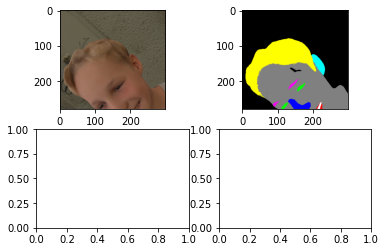

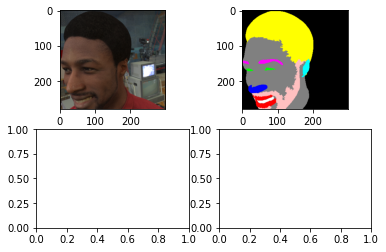

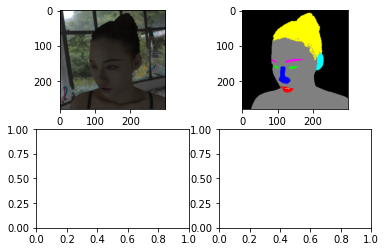

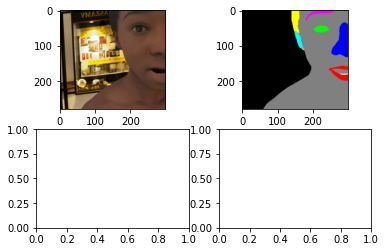

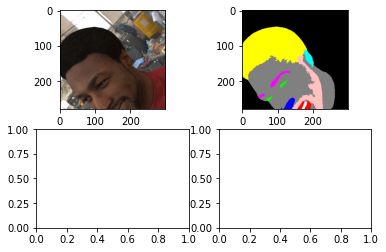

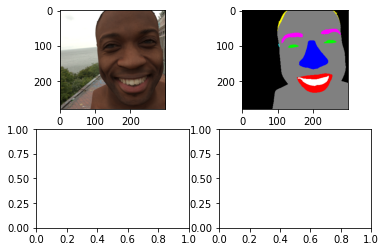

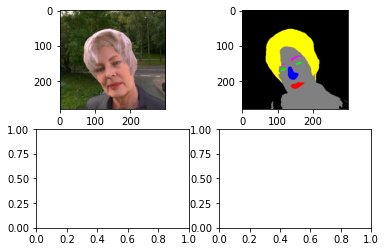

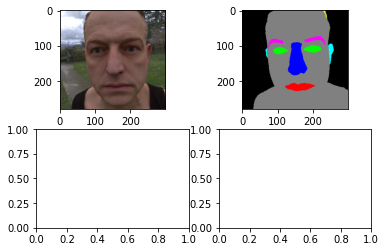

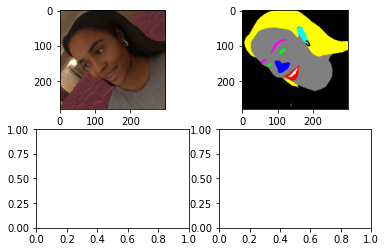

real osho_seq51672_scaled.png (239, 256) (256, 239)


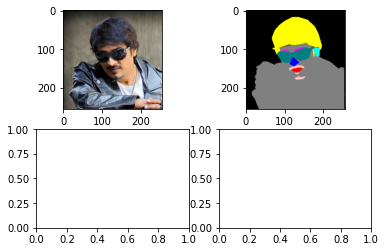

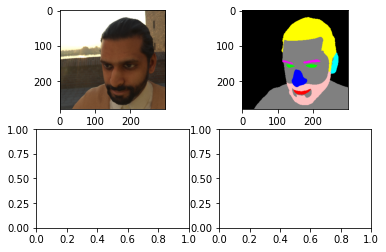

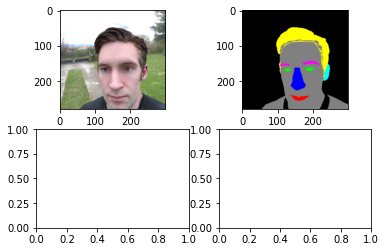

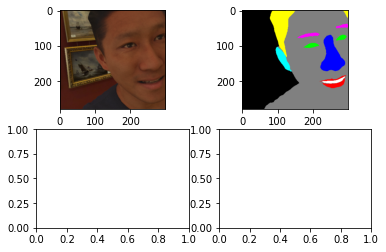

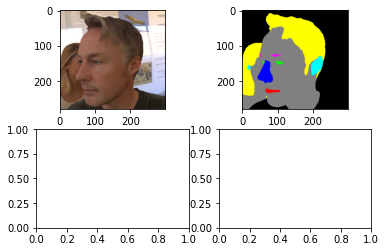

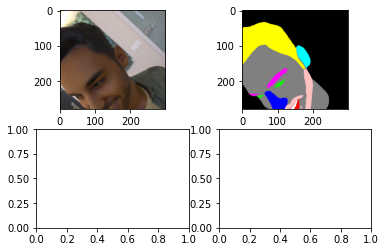

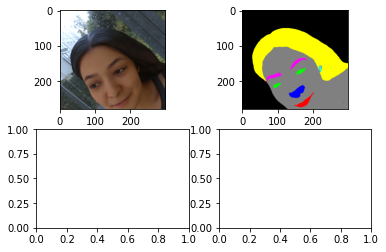

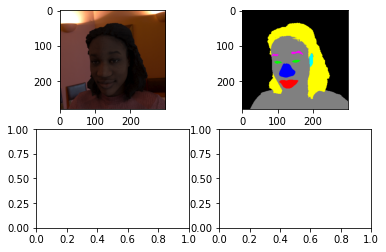

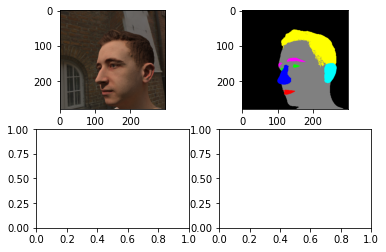

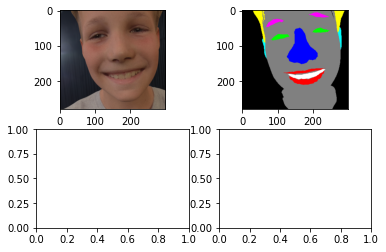

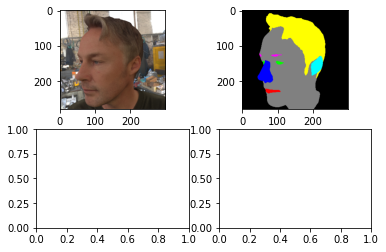

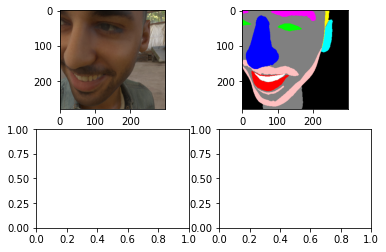

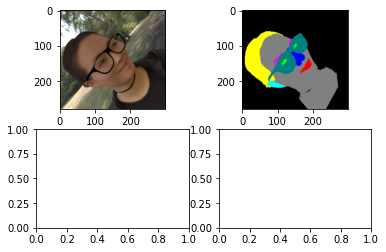

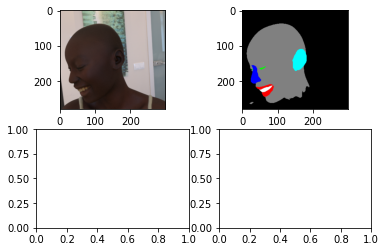

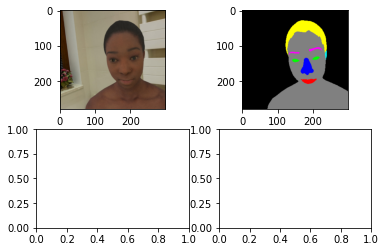

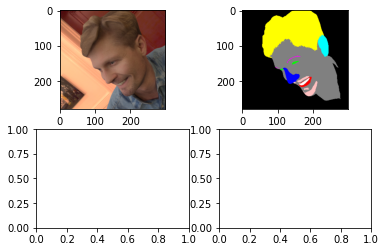

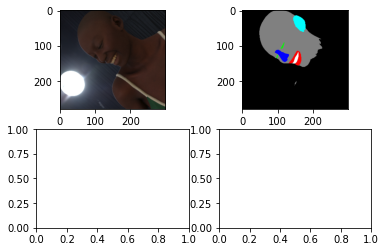

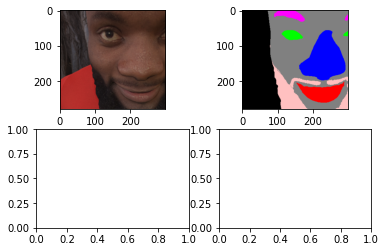

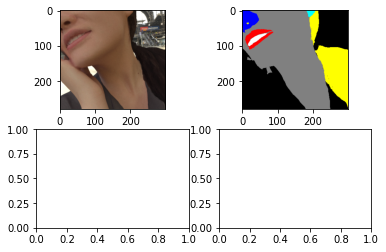

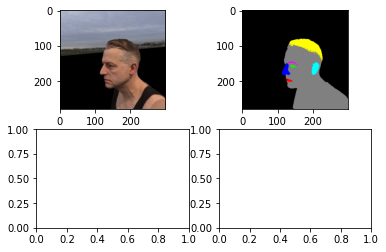

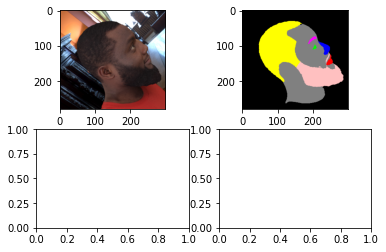

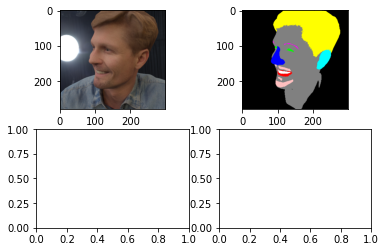

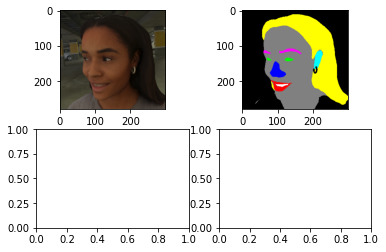

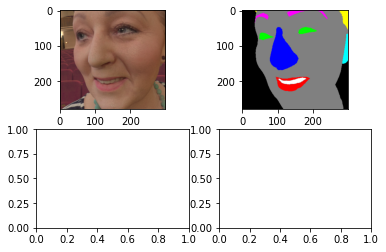

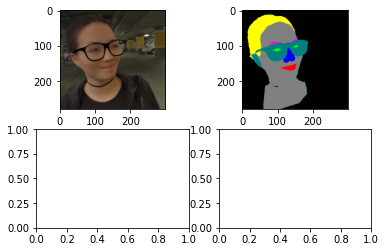

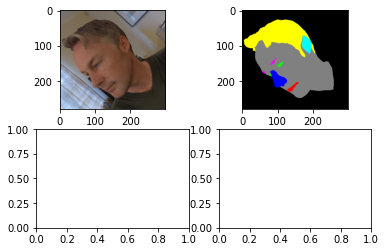

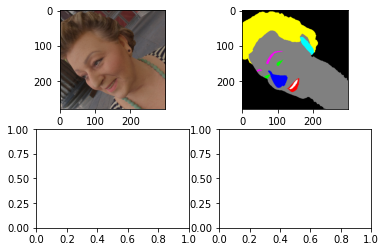

In [78]:
import matplotlib.pyplot as plt

allSamples = []
_id = 0
for folder in os.listdir(outputPath):
    for file in os.listdir(os.path.join(outputPath, folder)):
        if file in os.listdir(os.path.join(labelsPath, folder)):
            image = Image.open(os.path.join(outputPath, folder, file))
            mask = Image.open(os.path.join(labelsPath, folder, file))
            
            try:
                assert image.size == mask.size
                allSamples.append({"id": _id, "folder": folder, "Filename": file, "size": image.size})
                _id += 1
            except AssertionError:
                print(folder, file, image.size, mask.size)
    
    f, axarr = plt.subplots(2,2)
    axarr[0,0].imshow(image)
    axarr[0,1].imshow(mask)
    plt.show()

In [79]:
import pandas as pd
dataSamples = pd.DataFrame(allSamples, columns = allSamples[0].keys())
dataSamples.to_csv("FinalSamples.csv", index=False)

In [80]:
finalPath = r"../../faceSegmentation/dataset/"

%mkdir '../../faceSegmentation'
%mkdir '../../faceSegmentation/dataset'
%mkdir '../../faceSegmentation/dataset/images'
%mkdir '../../faceSegmentation/dataset/masks'

for row, sample in dataSamples.iterrows():
    imagePath = os.path.join(outputPath, sample["folder"], sample["Filename"])
    maskPath = os.path.join(labelsPath, sample["folder"], sample["Filename"])
    
    shutil.copy(imagePath, os.path.join(finalPath, "images", sample["folder"] + "_" + sample["Filename"]))
    shutil.copy(maskPath, os.path.join(finalPath, "masks", sample["folder"] + "_" + sample["Filename"]))
    

In [81]:
print(len(os.listdir('/Users/danielkim/Documents/Workspace/Vision/practice_code/VISION/Face/code_out/faceSegmentation/dataset/images')))
print(len(os.listdir('/Users/danielkim/Documents/Workspace/Vision/practice_code/VISION/Face/code_out/faceSegmentation/dataset/masks')))

14598
14598


In [82]:
from imutils import paths
import numpy as np
import argparse
import cv2
import os

In [83]:
def dhash(image, hashSize=8):
    # convert the image to grayscale and resize the grayscale image,
    # adding a single column (width) so we can compute the horizontal
    # gradient
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (hashSize + 1, hashSize))
    # compute the (relative) horizontal gradient between adjacent
    # column pixels
    diff = resized[:, 1:] > resized[:, :-1]
    # convert the difference image to a hash and return it
    return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])

print("[INFO] computing image hashes...")
imagePaths = list(paths.list_images("/Users/danielkim/Documents/Workspace/Vision/practice_code/VISION/Face/code_out/faceSegmentation/dataset/images"))
hashes = {}
error = []
# loop over our image paths
for imagePath in imagePaths:
    try:
        # load the input image and compute the hash
        image = cv2.imread(imagePath)
        h = dhash(image)
        # grab all image paths with that hash, add the current image
        # path to it, and store the list back in the hashes dictionary
        p = hashes.get(h, [])
        p.append(imagePath)
        hashes[h] = p
    except Exception as e:
        print(e)
        error.append(imagePath)

[INFO] computing image hashes...


In [84]:
print(len(hashes))
print(len(error))

14464
0


In [85]:
remove = True

# loop over the image hashes
error = []
for (h, hashedPaths) in hashes.items():
    try:
        # check to see if there is more than one image with the same hash
        if len(hashedPaths) > 1:
            # check to see if this is a dry run
            if not remove:
                # initialize a montage to store all images with the same
                # hash
                montage = None
                # loop over all image paths with the same hash
                for p in hashedPaths:
                    # load the input image and resize it to a fixed width
                    # and heightG
                    image = cv2.imread(p)
                    image = cv2.resize(image, (150, 150))
                    # if our montage is None, initialize it
                    if montage is None:
                        montage = image
                    # otherwise, horizontally stack the images
                    else:
                        montage = np.hstack([montage, image])
                # show the montage for the hash
                print("[INFO] hash: {}".format(h))
                cv2.imshow("Montage", montage)
                cv2.waitKey(0)
            # otherwise, we'll be removing the duplicate images
            else:
                # loop over all image paths with the same hash *except*
                # for the first image in the list (since we want to keep
                # one, and only one, of the duplicate images)
                for p in hashedPaths[1:]:
                    os.remove(p)
                    os.remove(p.replace("/images/", "/masks/"))
    except Exception as e:
        print(e)
        error.append(h)

In [86]:
print(len(error))

0


In [87]:
print(len(os.listdir(os.path.join("../../faceSegmentation/dataset/images"))))

14464


In [55]:
%pwd

'/Users/danielkim/Documents/Workspace/Vision/practice_code/VISION/Face/code_out/code_1/code_1_1'

In [88]:
allFilesPath = '../../faceSegmentation/dataset/'
subSamplesPath = '../../faceSegmentation/dataset/subsamples'

%mkdir '../../faceSegmentation/dataset/subsamples'
%mkdir '../../faceSegmentation/dataset/subsamples/images'
%mkdir '../../faceSegmentation/dataset/subsamples/masks'

In [89]:
oldFolders = {}

for imageFile, maskFile in zip(os.listdir(os.path.join(allFilesPath, "images")), os.listdir(os.path.join(allFilesPath, "masks"))):
    if imageFile == maskFile:
        try:
            if oldFolders.get(imageFile.split("_")[0]):
                oldFolders[imageFile.split("_")[0]] += 1
            else:
                oldFolders[imageFile.split("_")[0]] = 1
        except:
            oldFolders[imageFile.split("_")[0]] = 1
            
    else:
        print(imageFile)

In [90]:
oldFolders

{'real': 1723,
 'malecorry': 334,
 'maleandrew2': 251,
 'malecarlos2': 251,
 'femalealison2': 167,
 'female10': 501,
 'malebruce2': 501,
 'female23': 334,
 'male01': 501,
 'male09': 109,
 'male06': 608,
 'malecorry2': 501,
 'malebruce': 334,
 'malekumar': 501,
 'femalebarbera2': 501,
 'femaleroberta': 501,
 'malecarlos': 334,
 'malegaberial': 334,
 'femalecarla2': 501,
 'multiperson': 501,
 'malegaberial2': 250,
 'femalelaura': 334,
 'femalejoyce2': 501,
 'femalebarbera': 334,
 'female03': 501,
 'maleelias2': 501,
 'femalefelice': 251,
 'maleshawn': 334,
 'femalealison1': 167,
 'maleandrew': 334,
 'femalecarla': 334,
 'maleelias': 333,
 'femalejoyce': 334,
 'femalelaura2': 501,
 'male23': 167}

In [91]:
len(oldFolders)

35

In [92]:
import random

addedFiles = {k: 0 for k in oldFolders.keys()}

allImages = os.listdir(os.path.join(allFilesPath, "images"))
random.shuffle(allImages)
error = []
for image in allImages:
    try:
        if image.split("_")[0] == "real" or (image.split("_")[0] == "multiperson" and addedFiles[image.split("_")[0]]<50) or addedFiles[image.split("_")[0]]<10:
            addedFiles[image.split("_")[0]] += 1
            shutil.copy(os.path.join(allFilesPath, "images", image), os.path.join(subSamplesPath, "images", image))
            shutil.copy(os.path.join(allFilesPath, "masks", image), os.path.join(subSamplesPath, "masks", image))
    except Exception as e:
        print(e)
        error.append(image)

In [93]:
len(error)

0

In [94]:
len(allImages)

14464

In [96]:
addedFiles

{'real': 1723,
 'malecorry': 10,
 'maleandrew2': 10,
 'malecarlos2': 10,
 'femalealison2': 10,
 'female10': 10,
 'malebruce2': 10,
 'female23': 10,
 'male01': 10,
 'male09': 10,
 'male06': 10,
 'malecorry2': 10,
 'malebruce': 10,
 'malekumar': 10,
 'femalebarbera2': 10,
 'femaleroberta': 10,
 'malecarlos': 10,
 'malegaberial': 10,
 'femalecarla2': 10,
 'multiperson': 50,
 'malegaberial2': 10,
 'femalelaura': 10,
 'femalejoyce2': 10,
 'femalebarbera': 10,
 'female03': 10,
 'maleelias2': 10,
 'femalefelice': 10,
 'maleshawn': 10,
 'femalealison1': 10,
 'maleandrew': 10,
 'femalecarla': 10,
 'maleelias': 10,
 'femalejoyce': 10,
 'femalelaura2': 10,
 'male23': 10}

In [97]:
newFolders = {}

for imageFile, maskFile in zip(os.listdir(os.path.join(subSamplesPath, "images")), os.listdir(os.path.join(subSamplesPath, "masks"))):
    if imageFile == maskFile:
        try:
            if newFolders.get(imageFile.split("_")[0]):
                newFolders[imageFile.split("_")[0]] += 1
            else:
                newFolders[imageFile.split("_")[0]] = 1
        except:
            newFolders[imageFile.split("_")[0]] = 1
            
    else:
        print(imageFile)

        
print("NEW DISTRIBUTION OF SAMPLES: ", len(os.listdir(os.path.join(subSamplesPath, "images"))))
print(newFolders)

NEW DISTRIBUTION OF SAMPLES:  2103
{'real': 1723, 'multiperson': 50, 'male23': 10, 'male09': 10, 'femalebarbera2': 10, 'maleshawn': 10, 'malecarlos2': 10, 'femalelaura': 10, 'femalefelice': 10, 'femalealison1': 10, 'female03': 10, 'malecorry': 10, 'female23': 10, 'female10': 10, 'malebruce': 10, 'malecarlos': 10, 'femalebarbera': 10, 'male06': 10, 'malegaberial2': 10, 'malekumar': 10, 'femalejoyce2': 10, 'maleelias': 10, 'maleelias2': 10, 'femaleroberta': 10, 'femalecarla2': 10, 'male01': 10, 'femalelaura2': 10, 'femalecarla': 10, 'femalejoyce': 10, 'malegaberial': 10, 'malebruce2': 10, 'malecorry2': 10, 'maleandrew2': 10, 'maleandrew': 10, 'femalealison2': 10}


In [99]:
shutil.make_archive('subsampling_data','zip','/Users/danielkim/Documents/Workspace/Vision/practice_code/VISION/Face/code_out/faceSegmentation')

'/Users/danielkim/Documents/Workspace/Vision/practice_code/VISION/Face/code_out/code_1/code_1_1/subsampling_data.zip'

# Datalodaer

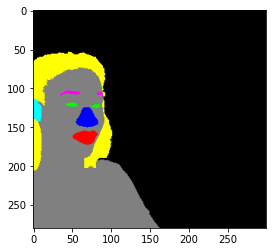

In [125]:
import cv2
mul_mask =cv2.imread('/Users/danielkim/Documents/Workspace/Vision/practice_code/VISION/Face/code_out/faceSegmentation/dataset/subsamples/masks/female03_headrende0009.png')
plt.imshow(cv2.cvtColor(mul_mask,cv2.COLOR_BGR2RGB))

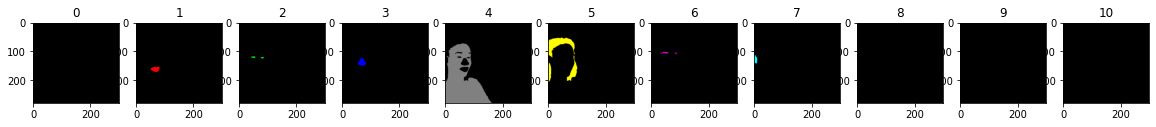

In [159]:
# BGR
background = np.array( [0, 0, 0] )
nose = np.array( [255, 0, 0] )
eyes = np.array( [0, 255, 0] )
lips_mouths = np.array( [0, 0, 255] )
general_face = np.array( [128, 128, 128] )
ears = np.array( [255, 255, 0] )
eyebrows = np.array( [255, 0, 255] )
hair = np.array( [0, 255, 255] )
teeth = np.array( [255, 255, 255] )
facial_hair = np.array( [192, 192, 255] )
acc = np.array( [0, 128, 128] )


back= cv2.inRange( mul_mask, background, background )
lip = cv2.inRange( mul_mask, lips_mouths, lips_mouths )
eye = cv2.inRange( mul_mask, eyes, eyes )
no = cv2.inRange( mul_mask, nose, nose )
face = cv2.inRange( mul_mask, general_face, general_face )
ha = cv2.inRange( mul_mask, hair, hair )
eyeb = cv2.inRange( mul_mask, eyebrows, eyebrows )
ear = cv2.inRange( mul_mask, ears, ears )
tee = cv2.inRange( mul_mask, teeth, teeth )
faha = cv2.inRange( mul_mask, facial_hair, facial_hair )
ac = cv2.inRange( mul_mask, acc, acc )


options = [back, lip, eye, no, face, ha, eyeb, ear, tee, faha, ac]

plt.figure(figsize=(20,20))
for i, option in enumerate(options):
    result= cv2.bitwise_and ( mul_mask, mul_mask, mask = option)
    plt.subplot(2,len(options),i+1)
    plt.title(i)
    result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    plt.imshow(result)

In [189]:
lips_ = cv2.bitwise_and( mul_mask, mul_mask, mask = lip)
eye_ = cv2.bitwise_and( mul_mask, mul_mask, mask = eye)
no_ = cv2.bitwise_and( mul_mask, mul_mask, mask = no)
face_ = cv2.bitwise_and( mul_mask, mul_mask, mask = face)
hair_ = cv2.bitwise_and( mul_mask, mul_mask, mask = ha)
eyeb_ = cv2.bitwise_and( mul_mask, mul_mask, mask = eyeb)
ear_ = cv2.bitwise_and( mul_mask, mul_mask, mask = ear)

lips_ = cv2.cvtColor( lips_,cv2.COLOR_BGR2GRAY)
eye_ = cv2.cvtColor( eye_,cv2.COLOR_BGR2GRAY)
no_ = cv2.cvtColor( no_,cv2.COLOR_BGR2GRAY)
face_ = cv2.cvtColor( face_,cv2.COLOR_BGR2GRAY)
hair_ = cv2.cvtColor( hair_,cv2.COLOR_BGR2GRAY)
eyeb_ = cv2.cvtColor( eyeb_,cv2.COLOR_BGR2GRAY)
ear_ = cv2.cvtColor( ear_,cv2.COLOR_BGR2GRAY)



In [211]:
%cd '/Users/danielkim/Documents/Workspace/Vision/practice_code/VISION/Face/'

/Users/danielkim/Documents/Workspace/Vision/practice_code/VISION/Face


In [207]:
# %mkdir '/Users/danielkim/Documents/Workspace/Vision/practice_code/VISION/Face/sample'
%mkdir '/Users/danielkim/Documents/Workspace/Vision/practice_code/VISION/Face/sample/images/'
# %mkdir '/Users/danielkim/Documents/Workspace/Vision/practice_code/VISION/Face/sample/masks'

In [209]:
# shutil.copy('/Users/danielkim/Documents/Workspace/Vision/practice_code/VISION/Face/code_out/faceSegmentation/dataset/subsamples/masks/female03_headrende0009.png','/Users/danielkim/Documents/Workspace/Vision/practice_code/VISION/Face/sample/masks')
shutil.copy('/Users/danielkim/Documents/Workspace/Vision/practice_code/VISION/Face/code_out/faceSegmentation/dataset/subsamples/images/female03_headrende0009.png','/Users/danielkim/Documents/Workspace/Vision/practice_code/VISION/Face/sample/images')

'/Users/danielkim/Documents/Workspace/Vision/practice_code/VISION/Face/sample/images/female03_headrende0009.png'

In [283]:
img = cv2.imread('/Users/danielkim/Documents/Workspace/Vision/practice_code/VISION/Face/code_out/faceSegmentation/dataset/subsamples/images/female03_headrende0009.png')
mask = cv2.imread('/Users/danielkim/Documents/Workspace/Vision/practice_code/VISION/Face/code_out/faceSegmentation/dataset/subsamples/masks/female03_headrende0009.png')
sample_mask = cv2.imread('/Users/danielkim/Documents/Workspace/Vision/practice_code/VISION/Face/mask/female03_headrende0009_gray.png')

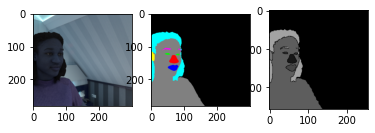

In [285]:
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(mask)
plt.subplot(133)
plt.imshow(sample_mask)


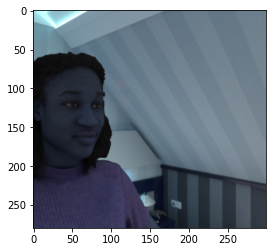

In [372]:
img = cv2.cvtColor(og_img, cv2.COLOR_BGR2GRAY)
plt.imshow(og_img)
img = cv2.resize(img, (256,256))
og_img = cv2.resize(og_img, (256,256))

In [374]:
A = cv2.bitwise_and(img,bw)

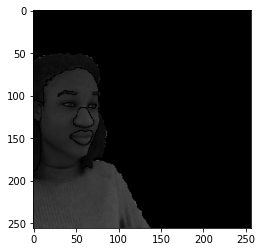

In [377]:
plt.imshow(cv2.cvtColor(A,cv2.COLOR_GRAY2RGB))